In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/Users/lakshanabhat/Downloads")
df = pd.read_excel('Cafe_Data_MRA.xlsx', date_parser=True)
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [2]:
df.set_index('Date', inplace=True)

In [3]:
df.shape

(145830, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145830 entries, 2010-04-01 to 2010-07-09
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Bill Number   145830 non-null  object 
 1   Item Desc     145830 non-null  object 
 2   Time          145830 non-null  object 
 3   Quantity      145830 non-null  int64  
 4   Rate          145830 non-null  float64
 5   Tax           145830 non-null  float64
 6   Discount      145830 non-null  float64
 7   Total         145830 non-null  float64
 8   Category      145830 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [5]:
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145830 entries, 2010-04-01 to 2010-07-09
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Bill Number   145830 non-null  object        
 1   Item Desc     145830 non-null  object        
 2   Time          145830 non-null  datetime64[ns]
 3   Quantity      145830 non-null  int64         
 4   Rate          145830 non-null  float64       
 5   Tax           145830 non-null  float64       
 6   Discount      145830 non-null  float64       
 7   Total         145830 non-null  float64       
 8   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 11.1+ MB


In [6]:
df.describe(datetime_is_numeric=False, include = 'all')

/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/1557809890.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(datetime_is_numeric=False, include = 'all')


,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
count,145830,145830,145830,145830.000000,145830.000000,145830.000000,145830.000000,145830.000000,145830
unique,69982,580,36200,NaN,NaN,NaN,NaN,NaN,9
top,G0490530,NIRVANA HOOKAH SINGLE,1900-01-01 22:25:36,NaN,NaN,NaN,NaN,NaN,FOOD
freq,23,8553,33,NaN,NaN,NaN,NaN,NaN,57023
first,NaN,NaN,1900-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,1900-01-01 23:59:57,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.121299,161.782259,48.929061,0.095079,224.959852,NaN
std,NaN,NaN,NaN,0.477237,102.244631,40.272851,3.720735,164.960776,NaN
min,NaN,NaN,NaN,1.000000,0.010000,0.000000,0.000000,0.010000,NaN
25%,NaN,NaN,NaN,1.000000,95.000000,22.560000,0.000000,117.560000,NaN


In [7]:
df.duplicated().sum()

680

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [11]:
df.dtypes

Bill Number             object
Item Desc               object
Time            datetime64[ns]
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
dtype: object

In [12]:
df.columns = df.columns.str.replace(" ",'')
df['Category'].value_counts()

FOOD                56658
BEVERAGE            43513
TOBACCO             36294
LIQUOR               6199
MISC                 1160
WINES                 805
MERCHANDISE           473
LIQUOR & TOBACCO       47
LIQUOR                  1
Name: Category, dtype: int64

In [13]:
df['Category'] = np.where(df['Category'] == 'LIQUOR ', 'LIQUOR', df['Category'])
df['Category'].value_counts()

FOOD                56658
BEVERAGE            43513
TOBACCO             36294
LIQUOR               6200
MISC                 1160
WINES                 805
MERCHANDISE           473
LIQUOR & TOBACCO       47
Name: Category, dtype: int64

In [14]:
df.dtypes


BillNumber            object
ItemDesc              object
Time          datetime64[ns]
Quantity               int64
Rate                 float64
Tax                  float64
Discount             float64
Total                float64
Category              object
dtype: object

In [15]:
df['ItemDesc'].value_counts()

NIRVANA HOOKAH SINGLE                   8392
MINT FLAVOUR SINGLE                     5812
CAPPUCCINO                              5474
GREAT LAKES SHAKE                       4875
SAMBUCA                                 4423
                                        ... 
UDAIPUR LILY                               1
ADD BUTTERED TOAST                         1
DECAFFINATE COFFEE FRAPPE                  1
INDIA KINGS OCEAN BLUE                     1
ZINZI WHITE (BTL)                          1
Name: ItemDesc, Length: 580, dtype: int64

In [16]:
from datetime import datetime
#pd.to_datetime(df['Time'], format = )
#df['Time'] = df['Time'].apply(pd.Timestamp) 
df['Time'] = pd.to_datetime(df['Time'].astype(str))
df['Time'].astype('str').str.slice(0,-8)

Date
2010-04-01    1900-01-01 
2010-04-01    1900-01-01 
2010-04-01    1900-01-01 
2010-04-01    1900-01-01 
2010-04-01    1900-01-01 
                 ...     
2010-05-22    1900-01-01 
2010-04-27    1900-01-01 
2010-05-28    1900-01-01 
2010-04-30    1900-01-01 
2010-07-09    1900-01-01 
Name: Time, Length: 145150, dtype: object

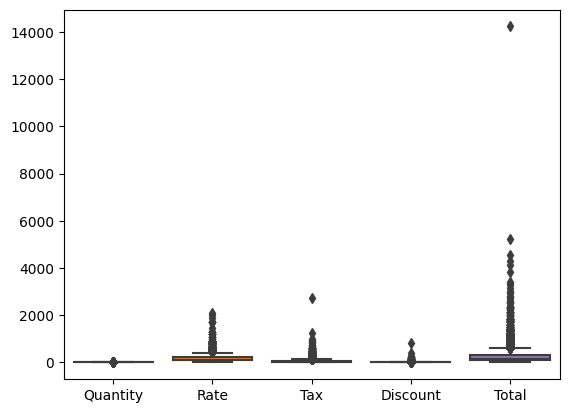

In [17]:
sns.boxplot(data = df);

      Columns  Outliers
0    Quantity     13469
1        Rate      2847
2         Tax      1684
3    Discount       272
4       Total      1917
5  BillNumber         0
6    ItemDesc         0
7        Time         0
8    Category         0


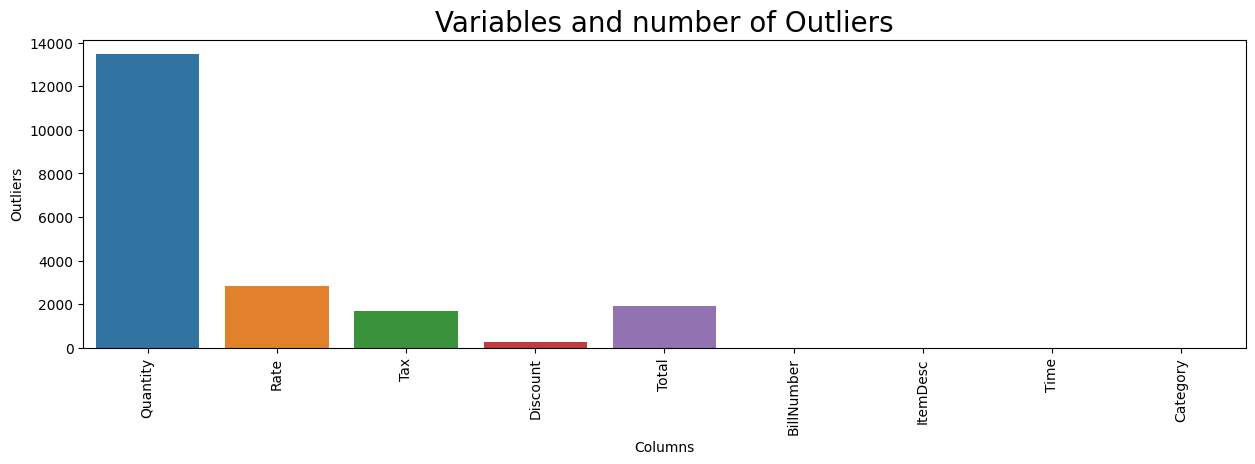

In [18]:
def outlier(df):
    numeric = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16','float32', 'float64'])
    outlier=pd.DataFrame()
    for i in numeric.columns:
        q1=numeric[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ot=[j if j>(q3+(1.5*iqr)) or j<(q1-(1.5*iqr)) else None for j in numeric[i]]
        outlier[i]=ot
    for k in df.columns:
        if k not in outlier.columns:
            ot=[None for y in df[k]]
            outlier[k]=ot
    outlier_count= outlier.notna().sum().reset_index()
    outlier_count.columns =['Columns','Outliers']
    print(outlier_count)
    plt.figure(figsize=(15, 4))
    sns.barplot(x = outlier_count['Columns'],y = outlier_count['Outliers'])
    plt.xticks(rotation=90)
    plt.title('Variables and number of Outliers', size = 20)
    return(outlier_count)
df_outlier_count = outlier(df)

In [19]:
df['Quantity'].value_counts()

1     131681
2      11009
3       1596
4        512
5        159
6         93
7         27
9         24
8         22
10         9
13         4
11         4
12         3
30         1
18         1
14         1
23         1
16         1
26         1
15         1
Name: Quantity, dtype: int64

In [20]:
df.columns

Index(['BillNumber', 'ItemDesc', 'Time', 'Quantity', 'Rate', 'Tax', 'Discount',
       'Total', 'Category'],
      dtype='object')

In [21]:
pd.DataFrame(df[['Category','ItemDesc','Rate','Quantity', 'Total']].value_counts()).sort_values(by='Total', ascending=False)

0
Category ItemDesc                       Rate    Quantity Total        
MISC     PARTY CHARGES @ 500/-          500.00  23       14231.25    1
LIQUOR   KF DRAUGHT PITCHER (2LTR)      400.00  10       5250.00     1
WINES    SULA BRUT (BTL)                1200.00 3        4536.00     1
         RED SANGRIA (CARAFE) áááááááá  850.00  4        4284.00     1
LIQUOR   STELLA ARTOIS MUG (1/2 LTR)    350.00  9        4134.38     1
...                                                                ...
FOOD     BUTTERED TOASTS                20.00   1        23.33       1
MISC     ADD ON S                       15.00   1        18.56     329
FOOD     ADD BUTTERED TOAST             15.00   1        18.56       1
WINES    1+1 WINE GLASS                 1.00    1        1.26        1
FOOD     MOTHERS DAY SPL                0.01    1        0.01        5

[1945 rows x 1 columns]

In [22]:
#df_clean = df.copy()

In [23]:
#df['Discount'].value_counts()

def remove_outlier(DataFrame):
    for i in DataFrame.select_dtypes(include = ['int', 'float']).columns:
            Q1,Q3=DataFrame[i].quantile([0.25,0.75])
            IQR=Q3-Q1
            lower_range= Q1-(1.5 * IQR)
            upper_range= Q3+(1.5 * IQR)
            DataFrame[i] = np.where(DataFrame[i] > upper_range, upper_range, DataFrame[i])
            DataFrame[i] = np.where(DataFrame[i] < lower_range, lower_range, DataFrame[i])
    return DataFrame

remove_outlier(df_clean)

df_clean['Quantity'] = df['Quantity']

outlier(df_clean)

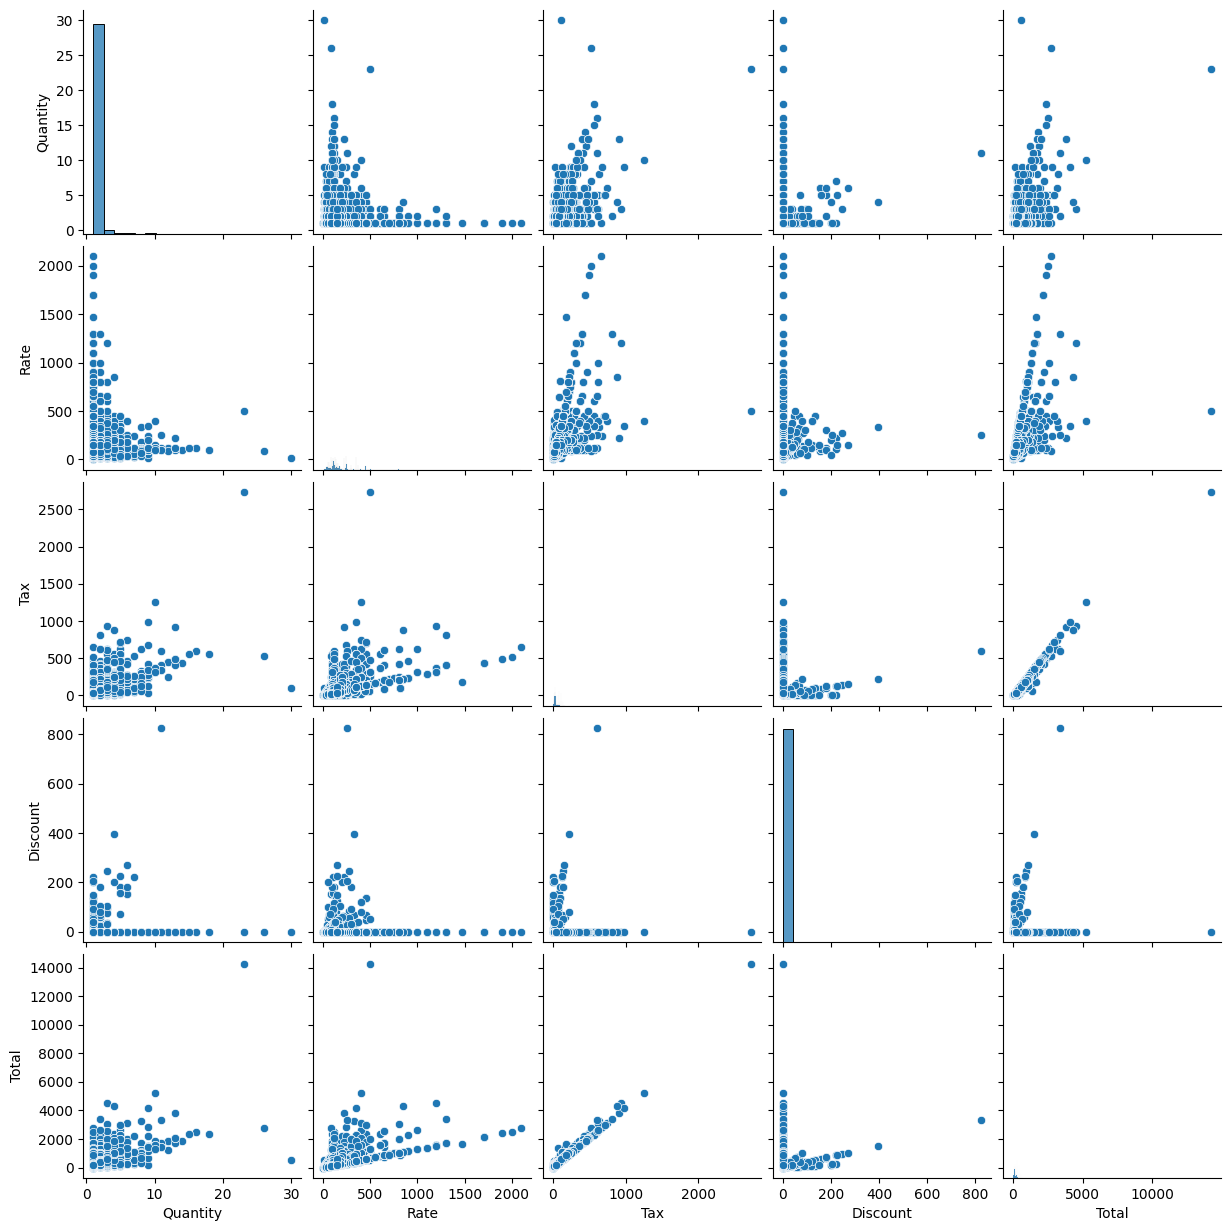

In [24]:
sns.pairplot(data = df);

/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/797600339.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


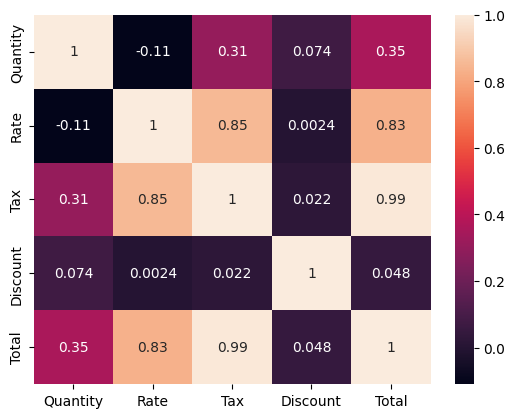

In [25]:
sns.heatmap(df.corr(), annot = True);


/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/2125507611.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.cov(), annot = True);


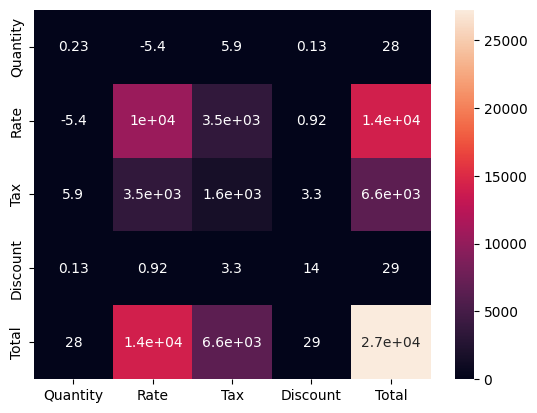

In [26]:
sns.heatmap(df.cov(), annot = True);

/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/3922858062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').mean().plot(kind = 'bar');


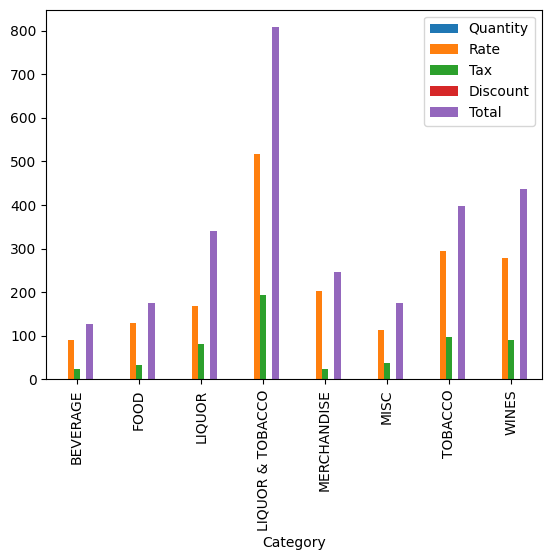

In [27]:
df.groupby('Category').mean().plot(kind = 'bar');

/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/936633380.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').median().plot(kind = 'bar');


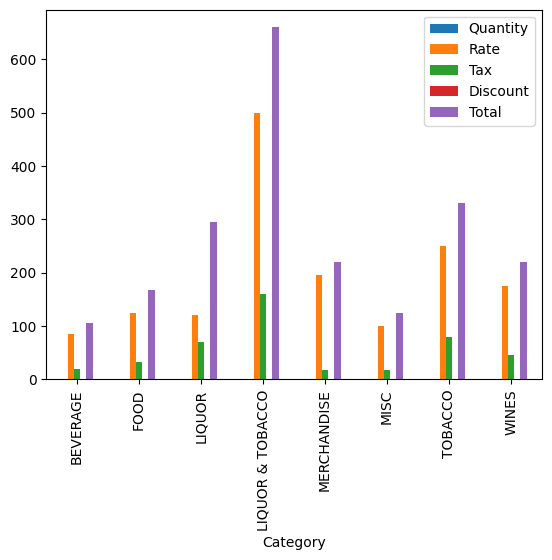

In [28]:
df.groupby('Category').median().plot(kind = 'bar');

/var/folders/p1/10cn4z0d3wg3sh4491m9690w0000gn/T/ipykernel_40609/2467242033.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').sum().plot(kind = 'bar');


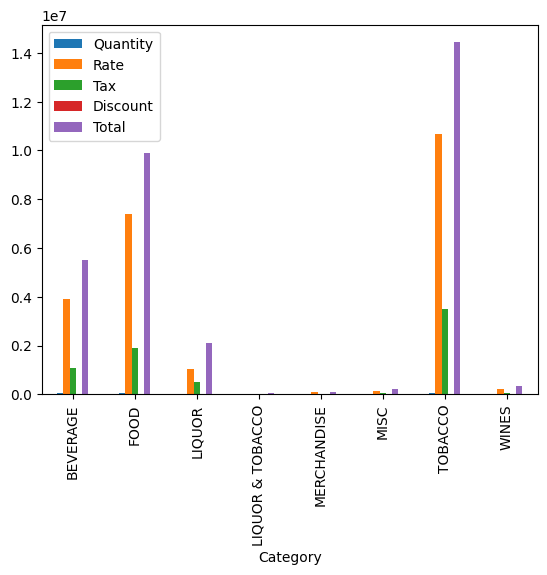

In [29]:
df.groupby('Category').sum().plot(kind = 'bar');

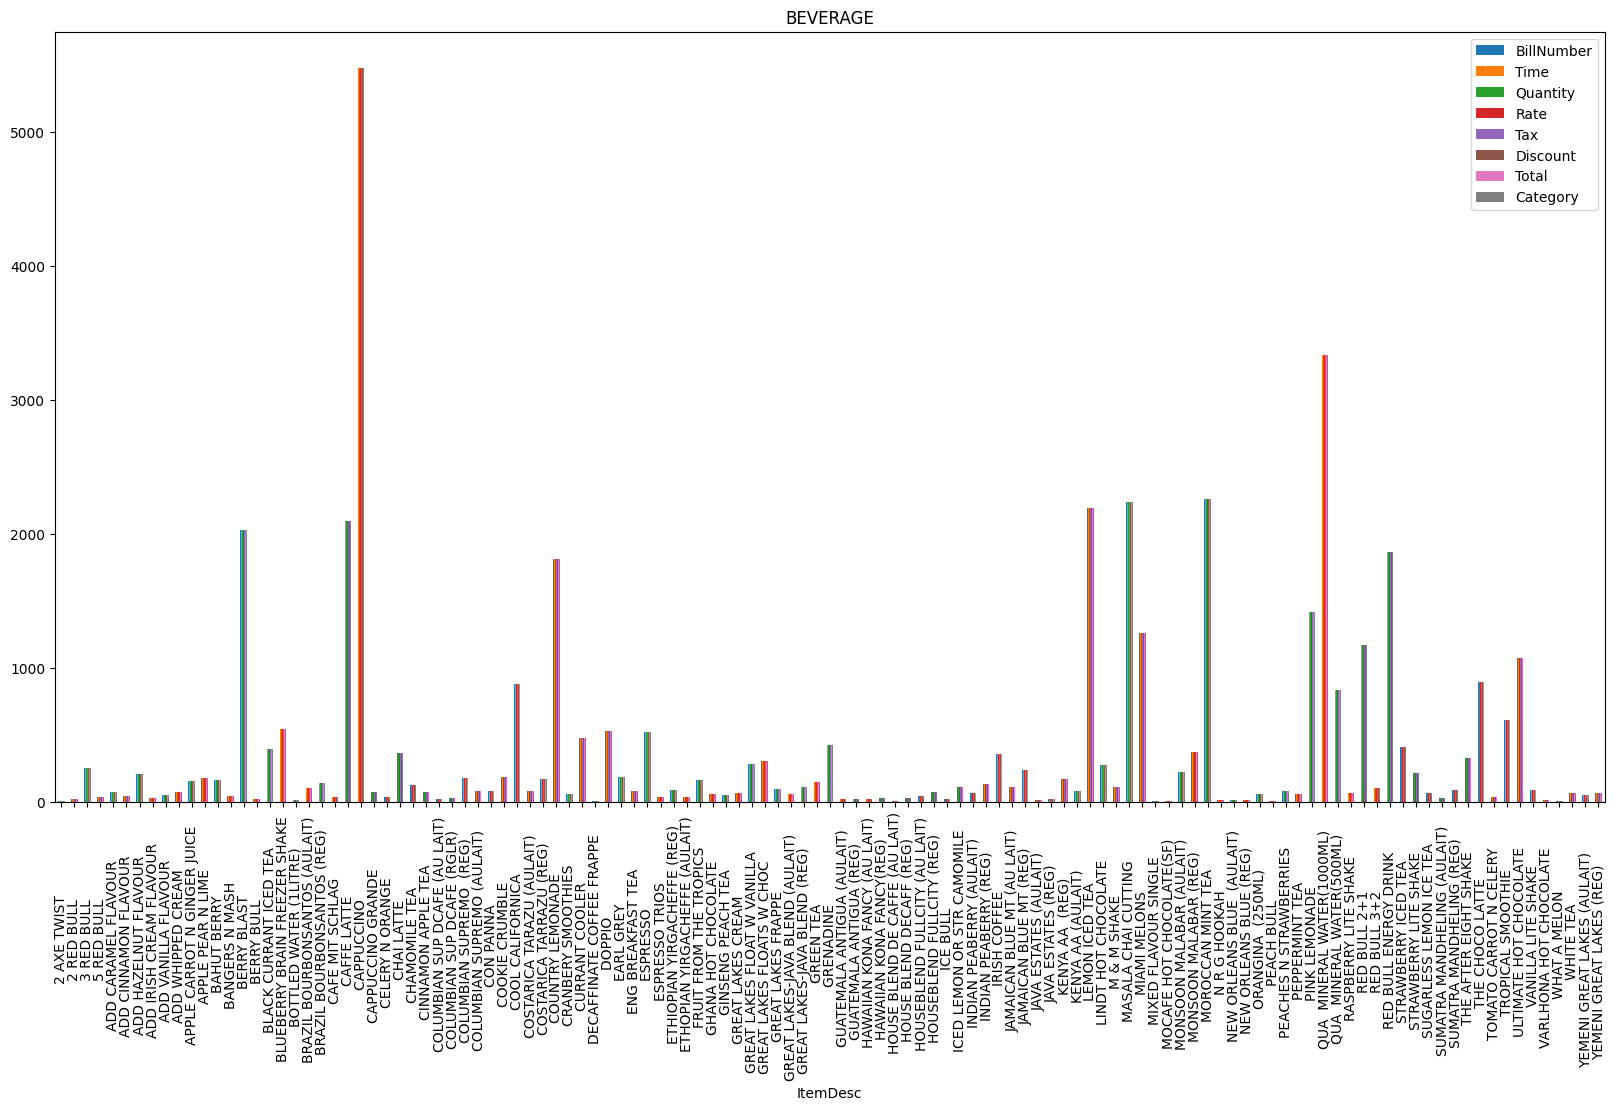

In [30]:

#plt.plot(data = df[df['Category'] == 'BEVERAGE'].groupby('ItemDesc').median())
df[df['Category'] == 'BEVERAGE'].groupby('ItemDesc').count().plot(kind = 'bar'
                                                                   ,figsize = (20,10)
                                                                   , title = 'BEVERAGE',);

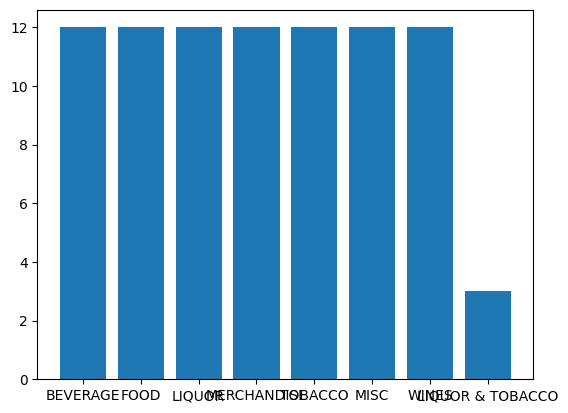

In [31]:
#sns.barplot(data = df[['Date', 'Category']]
month_data = df.copy()
month_data.index = month_data.index.month

plt.bar(height = month_data.index, x = month_data.Category);

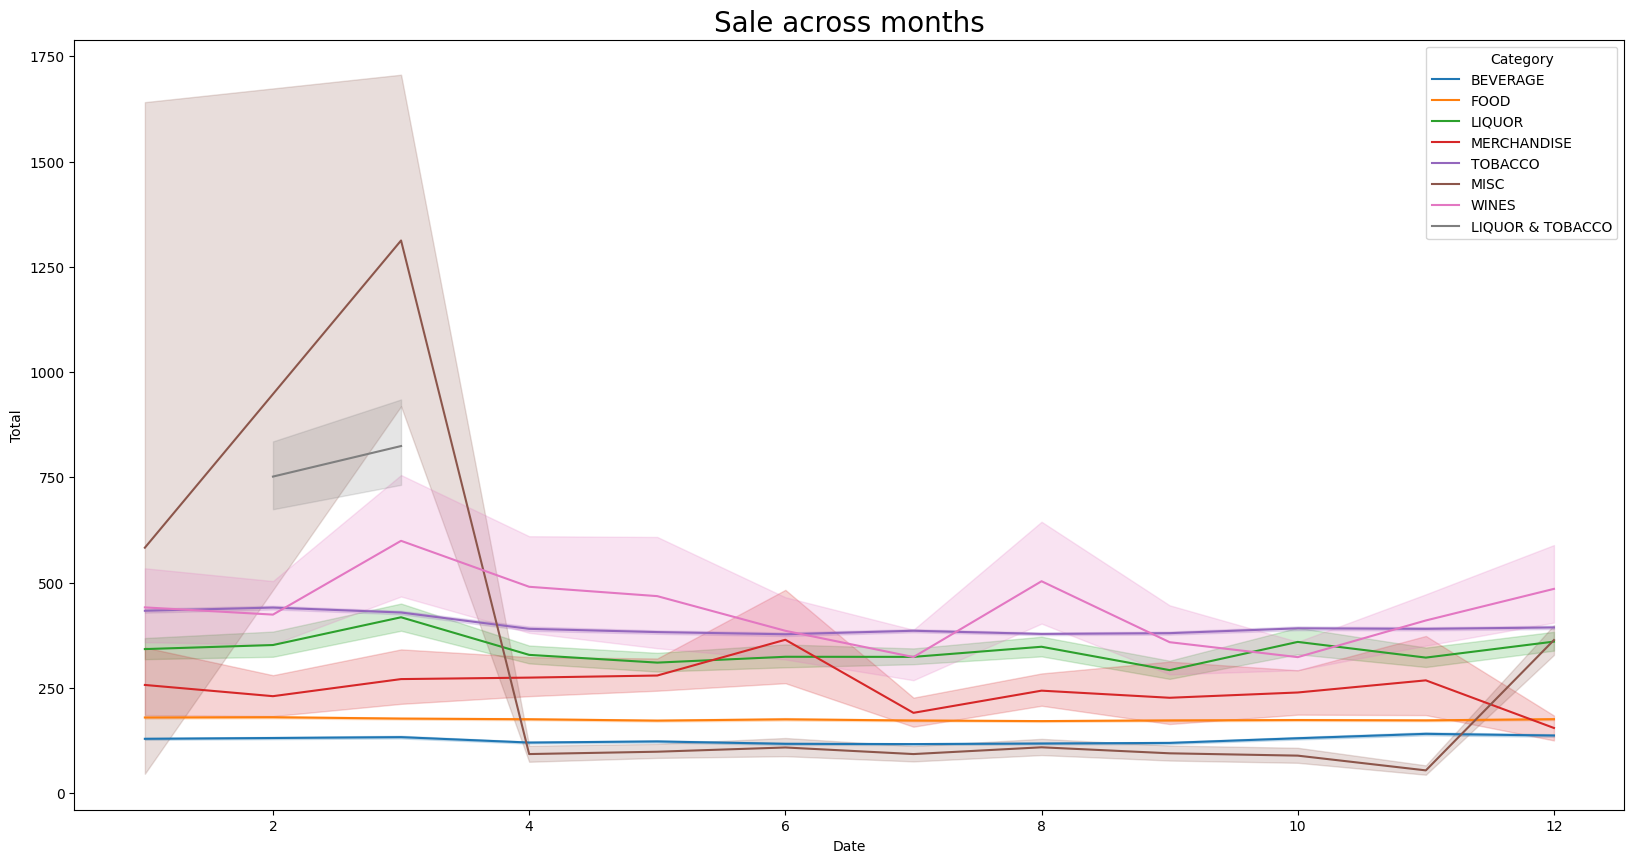

In [32]:
plt.figure(figsize=(20,10))
plt.title('Sale across months', size = 20)
sns.lineplot(x = month_data.index , y = month_data.Total, hue=month_data.Category, data = month_data);

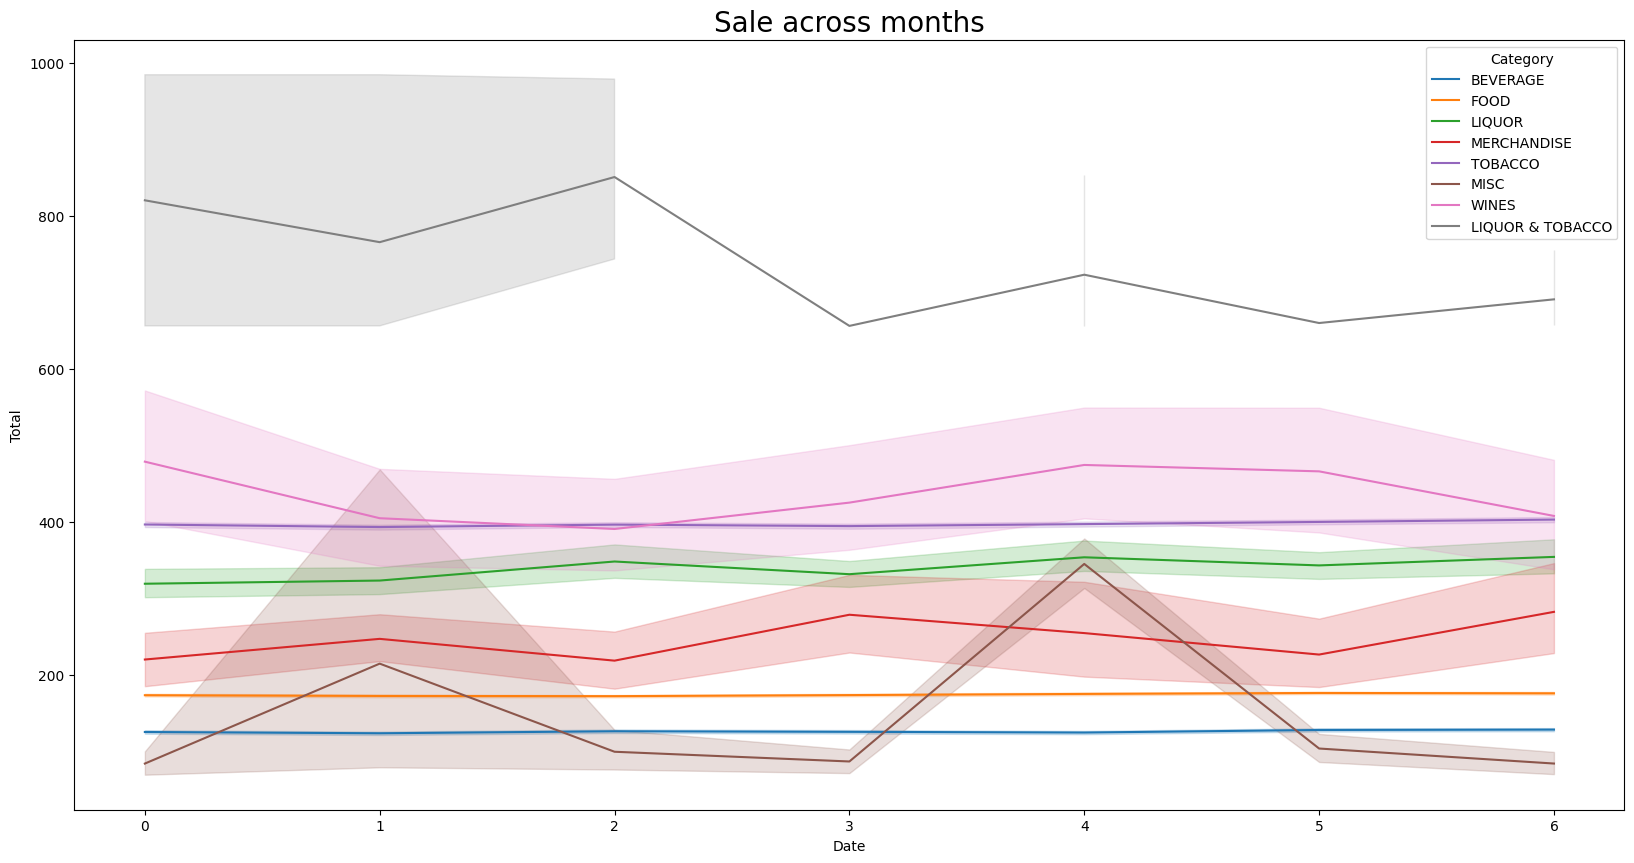

In [33]:
week_data = df.copy()
week_data.index = week_data.index.weekday
plt.figure(figsize=(20,10))
plt.title('Sale across months', size = 20)
sns.lineplot(x = week_data.index , y = week_data.Total, hue=week_data.Category, data = week_data);

In [34]:
Tobacco = pd.DataFrame(df[df['Category']=='TOBACCO']['ItemDesc'].value_counts())
Tobacco[Tobacco['ItemDesc']<=10]

,ItemDesc
BENSON & HEDGES SPL,9
SPICE SHEESHA,6
CLASSIC MENTHOL,4
CLASSIC ULTRA MILD,4
BENSON & HEGDES GOLD BLUE,3
GOLD FLAKE LIGHTS-BIG,3
MINT FLAVOUR DOUBLE,3
GREAT LAKES HOOKAH SINGLE,2
ICE SPICE SHEESHA,2
CLASSIC MENTHOL RUSH,2


In [35]:
Beverage = pd.DataFrame(df[df['Category']=='BEVERAGE']['ItemDesc'].value_counts())
Beverage[Beverage['ItemDesc']<=15]

,ItemDesc
JAVA ESTATES (AULAIT),15
N R G HOOKAH,15
NEW ORLEANS BLUE (REG),15
VARLHONA HOT CHOCOLATE,11
BOTTLED WATER (1LITRE),10
NEW ORLEANS BLUE (AULAIT),10
HOUSE BLEND DE CAFFE (AU LAIT),8
WHAT A MELON,4
PEACH BULL,1
MOCAFE HOT CHOCOLATE(SF),1


In [36]:
Liquor = pd.DataFrame(df[df['Category']=='LIQUOR']['ItemDesc'].value_counts())
Liquor[Liquor['ItemDesc']<=15]

,ItemDesc
VODKA (SM),14
TUBORG 2+1,13
STELLA ARTOIS MUG (1 LTR),13
CARLSBERG 2+1,12
BEER TANK 3.5 LITRE,10
ZINZI WHITE (GLS),9
ZINZI RED (GLS),9
1+1 KF 2 LITER,7
WHITE SANGRIA (CARAFE)áááááááá,6
TEQUILA,5


In [37]:
Liquor_and_tobacco = pd.DataFrame(df[df['Category']=='LIQUOR & TOBACCO']['ItemDesc'].value_counts())
Liquor_and_tobacco[Liquor_and_tobacco['ItemDesc']<=25]

,ItemDesc
2 DOM BEER + 1SPL SHEESHA,10
4 DOM BEER + 1SPL SHEESHA,2
2 DOM BEER + 1PREM SHEESHA,2


In [38]:
Merch = pd.DataFrame(df[df['Category']=='MERCHANDISE']['ItemDesc'].value_counts())
Merch[Merch['ItemDesc']<=1]

,ItemDesc
CH TSHIRTS,1
ROCK THE BOAT TEA LIGHT HOLDER,1
COUNTRY LEMONADE GLASS(HANSA),1
SHAKE GLASS,1
AVALANCHE BOWL,1
FLAVOR 1000 GMS,1
CH CRICKET NOTEBOOK,1
KITSCH PINK,1
GREAT LAKES MUG SINGLE,1
MUGS - PLAIN COLOUR,1


In [39]:
MISC = pd.DataFrame(df[df['Category']=='MISC']['ItemDesc'].value_counts())
MISC[MISC['ItemDesc']<=2]

,ItemDesc
QUESO CROQUETAS FRITOS,2
FISH FINGER,2
PHILADELPHIA CREAM CHEESECAKE,2
GIN (SM),2
POLLO CON AIOLI,2
ORANGE ARRABIATA,2
NUTELLA CREPES,2
HOTDOG WRAP,2
DARK RUM (SM),2
ROAST CHICKEN SALAD,2


In [40]:
Wine = pd.DataFrame(df[df['Category']=='WINES']['ItemDesc'].value_counts())
Wine[Wine['ItemDesc']<=8]

,ItemDesc
VLN CAB SAUV CLASIQ (BTL),8
VLN SAUV BLANC (BTL),7
VLN CAB SAUV (BTL),6
4 SEASONS CLAS SYRAH(GLS),5
SULA BRUT (BTL),5
DIA SPARKLING WINE(BTL),4
B1G1 ZINZI WHITE (BTL),3
4 SEASONS CLAS SAUV(GLS,3
MAISON PIERRE SAUV MARSAN,3
B1G1 ZINZI RED (BTL),3


In [41]:
pd.DataFrame(df['ItemDesc'].value_counts()).sort_values(by = 'ItemDesc', ascending=False).head(15)

,ItemDesc
NIRVANA HOOKAH SINGLE,8392
MINT FLAVOUR SINGLE,5812
CAPPUCCINO,5474
GREAT LAKES SHAKE,4875
SAMBUCA,4423
POUTINE WITH FRIES,3432
QUA MINERAL WATER(1000ML),3330
JR.CHL AVALANCHE,3307
CALCUTTA MINT,3307
B.M.T. PANINI,2621


In [42]:
df[['Category','ItemDesc']].groupby(['ItemDesc','Category']).count().sort_values(by = 'ItemDesc', ascending=False).head(15)

,
ItemDesc,Category
ZINZI WHITE (BTL),LIQUOR
ZINZI WHITE (GLS),LIQUOR
ZINZI RED (GLS),LIQUOR
ZERO SIZE SHOT GLS,MERCHANDISE
ZEN ROCK SQUARE VASE,MERCHANDISE
YIN N YANG FONDUE,FOOD
YEMENI GREAT LAKES (REG),BEVERAGE
YEMENI GREAT LAKES (AULAIT),BEVERAGE
WILD MUSHROOM LINGUINI,FOOD
